# Brain-behaviour association simulation example

A multiverse is defined as a dictionary of decision/option pairs. For example, consider a hypothetical analysis pipeline which correlates global efficiency of static brain networks with general cognitive abiity. Such an analysis pipeline involves many decision points, for example the software package for preprocessing, parametrs for data cleaning, or different methods for the connectivity estimation.

We here illustrate this with a hypothetical multiverse with the following forking paths:

- 3 software packages (fMRIprep, CONN, or SPM) for preprocessing
- 2 options for global signal regression (True/False)
- 4 parcellation schemes (AAL, Schaefer 200, or Glasser MMP atlas)
- 3 connectivity measures (pearson correlation, partial correlation, or mutual information)
- 3 density values for thresholding the connectivity matrix (10%, 30%, and 50%)

The total number of possible combinations is $3 \times 2 \times 4 \times 3 \times 3 = 216$, which means our multiverse will contain 216 universes.

In [1]:
from comet.multiverse import Multiverse

forking_paths = {
    "software": ["fMRIprep", "CONN", "SPM"],
    "gsr": [True, False],
    "parcellation": ["AAL", "Power 160", "Schaefer 200", "Glasser MMP"],
    "connectivity": ["pearson", "partial", "mutual info"],
    "threshold": [0.1, 0.3, 0.5],
}

We then simulate some results by adding systematic differences (depending on the analytical choices) and noise to a baseline value:

In [2]:
def analysis_template():
    import comet
    import numpy as np
    from scipy.stats import ttest_1samp

    # Base correlation between global efficiency and cognitive ability
    base_correlation = 0.15
    
    # Global signal regression reduces the association by 0.1
    if {{gsr}} == True:
        base_correlation -= 0.1
    # More detailed parcellations increase the association by 0.1
    if {{parcellation}} in ["Schaefer 200", "Glasser MMP"]:
        base_correlation += 0.1
    # Pearson correlation increases the association by 0.03
    if {{connectivity}} == "pearson":
        base_correlation += 0.03
    # Higher threshold increase the association
    base_correlation += {{threshold}} * 0.1

    # Simulate 100 participants with some added variability
    brain_behaviour = [base_correlation + np.random.normal(0, 1) for _ in range(100)]
    _, p_val = ttest_1samp(brain_behaviour, popmean=0)

    result = {
        "brain_behaviour": [round(association, 3) for association in brain_behaviour],
        "p_val": round(p_val, 3),
    }

    comet.utils.save_universe_results(result)

With the forking paths and the analysis template defined, we can create and visualize the multiverse:

,Universe,Decision 1,Value 1,Decision 2,Value 2,Decision 3,Value 3,Decision 4,Value 4,Decision 5,Value 5
0,Universe_1,software,fMRIprep,gsr,True,parcellation,AAL,connectivity,pearson,threshold,0.1
1,Universe_2,software,fMRIprep,gsr,True,parcellation,AAL,connectivity,pearson,threshold,0.3
2,Universe_3,software,fMRIprep,gsr,True,parcellation,AAL,connectivity,pearson,threshold,0.5
3,Universe_4,software,fMRIprep,gsr,True,parcellation,AAL,connectivity,partial,threshold,0.1
4,Universe_5,software,fMRIprep,gsr,True,parcellation,AAL,connectivity,partial,threshold,0.3
...,...,...,...,...,...,...,...,...,...,...,...
211,Universe_212,software,SPM,gsr,False,parcellation,Glasser MMP,connectivity,partial,threshold,0.3
212,Universe_213,software,SPM,gsr,False,parcellation,Glasser MMP,connectivity,partial,threshold,0.5
213,Universe_214,software,SPM,gsr,False,parcellation,Glasser MMP,connectivity,mutual info,threshold,0.1
214,Universe_215,software,SPM,gsr,False,parcellation,Glasser MMP,connectivity,mutual info,threshold,0.3


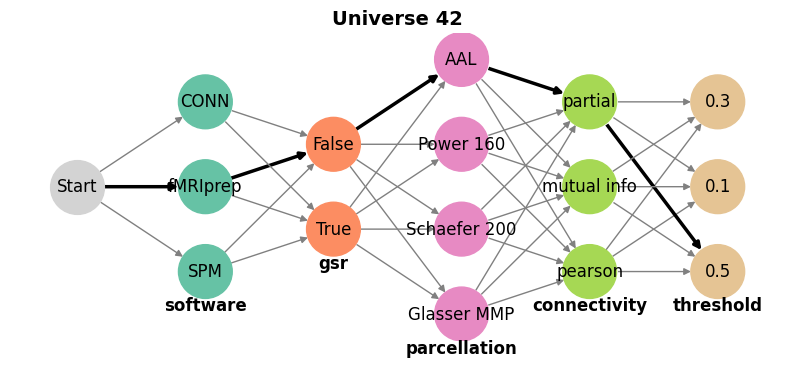

In [3]:
mverse = Multiverse(name="example_mv_features")
mverse.create(analysis_template, forking_paths)
mverse.summary()
mverse.visualize(universe=42, figsize=(10, 4))

And subsequently run it:

In [ ]:
mverse.run(parallel=8)

Once completed, the results can be visualised in a specification curve:

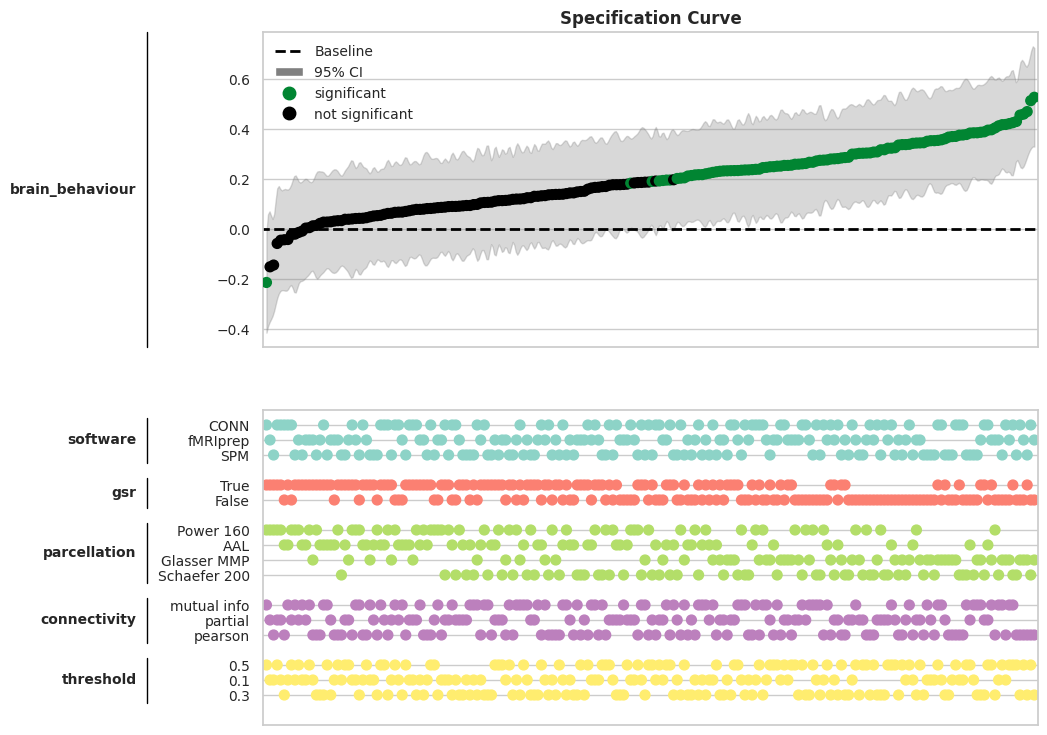

In [5]:
mverse.specification_curve(measure="brain_behaviour", baseline=0, p_value=0.05, ci=95, smooth_ci=True,
                           cmap="Set3", figsize=(10,9), fontsize=10, height_ratio=(1,1), line_pad=0.1, ftype="pdf")

Or as a multiverse plot:

*Note: Both specification curves and multiverse plots can be provided with a name map for nicer visualisation*

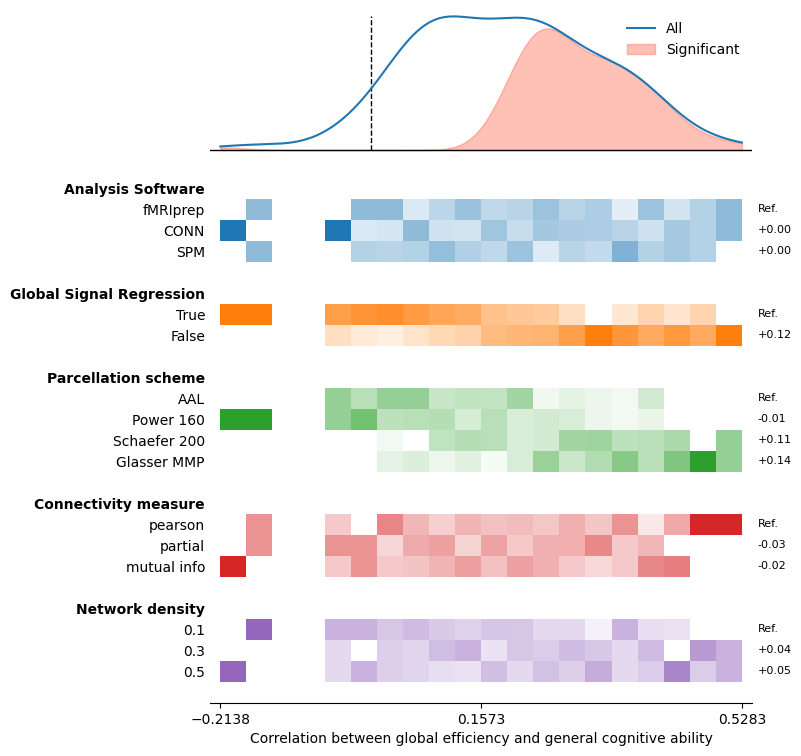

In [6]:
name_map = {
    "brain_behaviour": "Correlation between global efficiency and general cognitive ability",
    "software": "Analysis Software",
    "gsr": "Global Signal Regression",
    "parcellation": "Parcellation scheme",
    "connectivity": "Connectivity measure",
    "threshold": "Network density"
}

mverse.multiverse_plot(measure="brain_behaviour", n_bins=20, sig_col="p_val", name_map=name_map, baseline=0)

Results can be accessed in multiple ways:

In [7]:
# Get all results as a nested dictionary
results = mverse.get_results()
print("Universe 1 results:", results["universe_1"]["brain_behaviour"])

# Get single universe results
results = mverse.get_results(universe=1)
print("Universe 1 results:", results["brain_behaviour"])

# Get all results as a pandas DataFrame
df_results = mverse.get_results(as_df=True)
df_results

Universe 1 results: [-0.856, 0.494, 0.3, 0.354, -1.421, 1.165, 0.705, -2.198, 0.046, -0.618, 0.096, 0.138, 0.711, -1.252, 0.008, 1.021, -1.858, 1.11, -0.83, 0.69, 0.602, -0.484, -1.375, -0.085, -0.647, -2.876, 0.013, -0.178, 0.309, 0.38, -0.259, 0.769, 1.452, 0.338, -0.571, -0.308, 0.067, 1.369, -1.191, 0.591, 1.49, 0.652, 0.212, -0.422, 0.449, -0.971, 0.863, 0.264, -0.205, 0.466, -0.479, -0.41, -1.397, 0.849, -0.822, -1.567, 0.543, 1.708, 0.249, 2.123, 0.786, 0.636, -0.903, 0.099, 2.435, 2.165, -0.028, 2.523, -0.774, 0.345, -0.634, -0.607, -0.782, 0.748, 0.205, -0.275, 1.268, 0.45, 0.087, 0.692, 0.493, -0.278, 1.09, 1.176, -0.028, 0.378, -1.191, 1.295, -0.029, -0.136, -0.654, 0.821, -0.209, 0.446, 2.072, -0.479, -0.259, -2.544, 0.922, -0.142]
Universe 1 results: [-0.856, 0.494, 0.3, 0.354, -1.421, 1.165, 0.705, -2.198, 0.046, -0.618, 0.096, 0.138, 0.711, -1.252, 0.008, 1.021, -1.858, 1.11, -0.83, 0.69, 0.602, -0.484, -1.375, -0.085, -0.647, -2.876, 0.013, -0.178, 0.309, 0.38, -0.259, 

,universe,brain_behaviour,p_val,decisions
1,universe_1,"[-0.856, 0.494, 0.3, 0.354, -1.421, 1.165, 0.7...",0.296,"{'Decision 1': 'software', 'Value 1': 'fMRIpre..."
2,universe_2,"[0.387, -1.957, -0.59, -0.708, 0.863, -0.817, ...",0.827,"{'Decision 1': 'software', 'Value 1': 'fMRIpre..."
3,universe_3,"[-0.332, -0.036, -0.766, 2.475, 0.499, 0.224, ...",0.645,"{'Decision 1': 'software', 'Value 1': 'fMRIpre..."
4,universe_4,"[-0.13, -0.246, 0.65, -2.288, 0.201, -0.883, -...",0.968,"{'Decision 1': 'software', 'Value 1': 'fMRIpre..."
5,universe_5,"[1.564, -0.337, 0.25, 0.642, 0.762, 0.625, 0.2...",0.768,"{'Decision 1': 'software', 'Value 1': 'fMRIpre..."
...,...,...,...,...
212,universe_212,"[0.575, 0.409, -0.434, 2.854, 0.657, 0.085, 0....",0.003,"{'Decision 1': 'software', 'Value 1': 'SPM', '..."
213,universe_213,"[1.41, 1.325, -0.57, 0.711, 0.266, 0.516, 1.54...",0.000,"{'Decision 1': 'software', 'Value 1': 'SPM', '..."
214,universe_214,"[-1.01, 0.975, 0.556, 2.215, 1.199, 0.502, 0.2...",0.000,"{'Decision 1': 'software', 'Value 1': 'SPM', '..."
215,universe_215,"[0.436, 0.755, -0.568, 2.722, -0.013, 0.679, 1...",0.000,"{'Decision 1': 'software', 'Value 1': 'SPM', '..."
